# Projeto 1 - Processamento Digital de Sinais
<br /> Alunos:
<br /> Diego Maia Hamilton
<br /> Pedro Luz A. L. de M. Peixoto

## Parte 1

### a)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def signal(omega_o, t):
   return np.sin(omega_o * t)

In [49]:
n = np.arange(0, 5*8192, 1)
omega_s = 2*np.pi*8192
omega_o = 2*np.pi*1000
T = 1/8192

x_1000 = signal(omega_o, n * T)

### b)

In [50]:
def letra_b(n, x, freq):
    plt.subplot(211)
    plt.stem(n[:51], x[:51])

    plt.xlabel('n')
    plt.ylabel('x[n]')
    # plt.title('x[n] = sin($\Omega_O n/8192$)')
    plt.grid(True)

    plt.subplot(212)
    plt.plot((n * T)[:51], x[:51])

    plt.xlabel('time (s)')
    plt.ylabel('x(nT)')
    # plt.title('x(t) = sin()')
    plt.grid(True)
    plt.savefig(f'plots/signals_{freq}.png')
    plt.show()

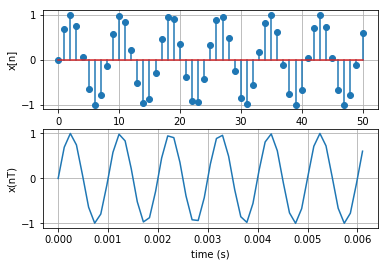

In [51]:
letra_b(n, x_1000, 1000)

### c)

In [52]:
from numpy.fft import fft, fftshift

def letra_c(x, T, freq):
    def ctfts(x, T):
        # based on MATLAB implementation of functions ctfts
        N = len(x)
        X = fftshift(fft(x, N) * (2*np.pi/N))
        w = np.linspace(-1, 1 - 1/N, N)/(2*T)
        
        return X, w
    
    X, w = ctfts(x, T)
    plt.subplot(121)
    plt.plot(w, np.abs(X))
    plt.ylabel('|X($\omega$)|')
    plt.xlabel('Freq (Hz)')
    
    plt.subplot(122)
    plt.plot(w, np.angle(X, deg = True))
    plt.tight_layout()
    plt.savefig(f'plots/letra_{freq}.png')
    plt.show()
    return

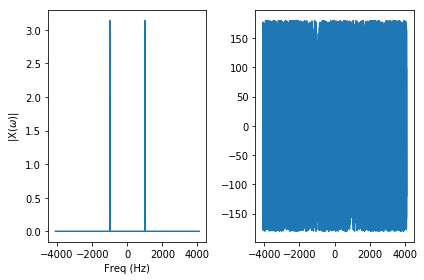

In [53]:
letra_c(x_1000, T, 1000)

## Parte 2

### d)

In [54]:
omega_1500 = 2*np.pi*1500
x_1500 = signal(omega_1500, n * T)

omega_2000 = 2*np.pi*2000
x_2000 = signal(omega_2000, n * T)

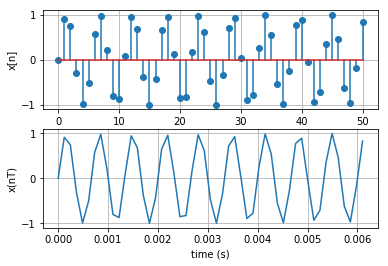

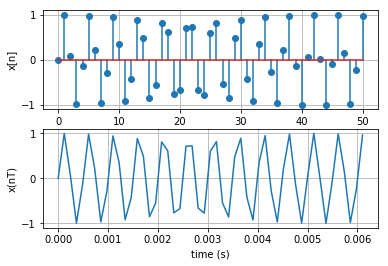

In [55]:
letra_b(n, x_1500, 1500)
letra_b(n, x_2000, 2000)

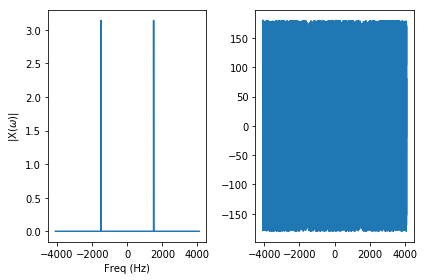

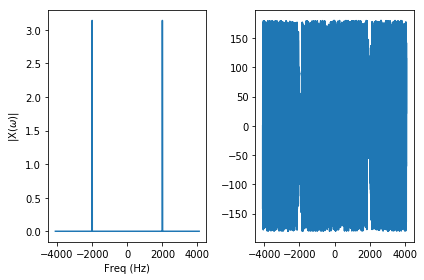

In [56]:
letra_c(x_1500, T, 1500)
letra_c(x_2000, T, 2000)

### e)

In [57]:
import scipy.io.wavfile as wav

In [58]:
def letra_e(x, T, freq):
    wave = np.array(x)# * 65536, dtype = 'int')
    rate = int(1/T)
    wav.write(f'sounds/signal_{freq}.wav', rate, wave)

In [59]:
letra_e(x_1000, T, 1000)
letra_e(x_1500, T, 1500)
letra_e(x_2000, T, 2000)

### f)

In [60]:
omega_3500 = 2*np.pi*3500
x_3500 = signal(omega_3500, n * T)

omega_4000 = 2*np.pi*4000
x_4000 = signal(omega_4000, n * T)

omega_4500 = 2*np.pi*4500
x_4500 = signal(omega_4500, n * T)

omega_5000 = 2*np.pi*5000
x_5000 = signal(omega_5000, n * T)

omega_5500 = 2*np.pi*5500
x_5500 = signal(omega_5500, n * T)

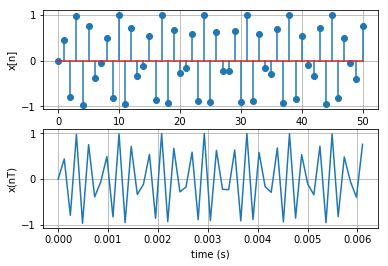

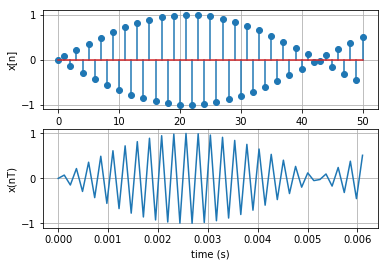

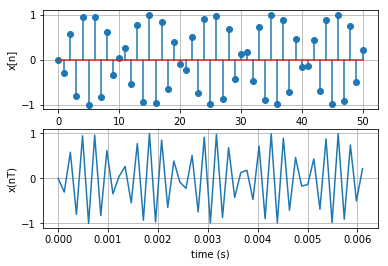

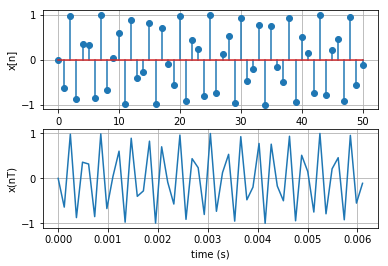

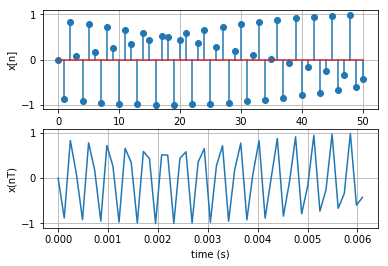

In [61]:
letra_b(n, x_3500, 3500)
letra_b(n, x_4000, 4000)
letra_b(n, x_4500, 4500)
letra_b(n, x_5000, 5000)
letra_b(n, x_5500, 5500)

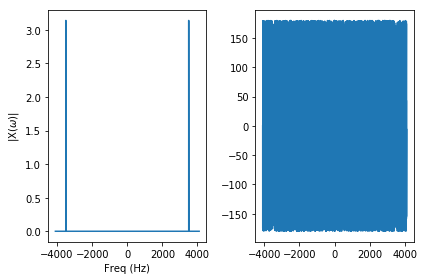

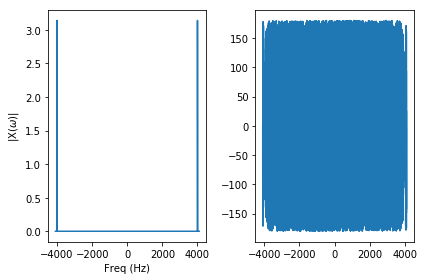

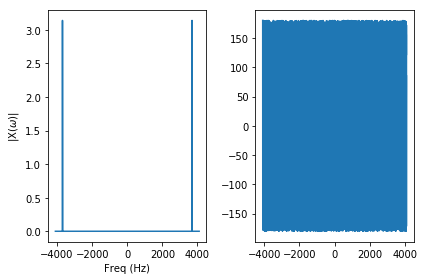

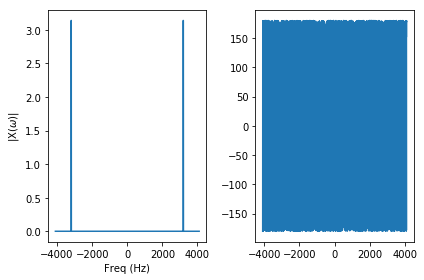

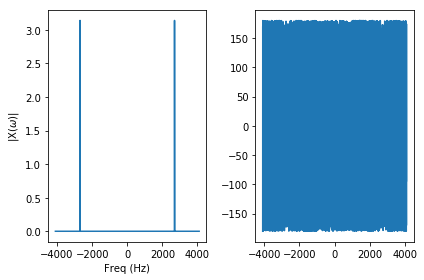

In [62]:
letra_c(x_3500, T, 3500)
letra_c(x_4000, T, 4000)
letra_c(x_4500, T, 4500)
letra_c(x_5000, T, 5000)
letra_c(x_5500, T, 5500)

In [63]:
letra_e(x_3500, T, 3500)
letra_e(x_4000, T, 4000)
letra_e(x_4500, T, 4500)
letra_e(x_5000, T, 5000)
letra_e(x_5500, T, 5500)

## Parte 3

In [64]:
def chirp(omega_o, beta, t):
    return np.sin(omega_o*t + 0.5 * beta * (t**2))

### g)

In [67]:
b = 3000
omega_3000 = 2*np.pi*3000
t = np.arange(0, 1+1/8192, 1/8192)

x_3000 = chirp(omega_3000, b, t)

### h)

In [48]:
letra_e(x_3000, T, 'chirp_3000')

### i)

In [70]:
t = np.arange(0, 20+1/8192, 1/8192)
freq = (omega_3000 + b * t) % (omega_s/2)
print(max(freq))
print(omega_s/2)

25735.78639028876
25735.927018207585


### j)

In [65]:
t = np.arange(0, 10+1/8192, 1/8192)
x_3000 = chirp(omega_3000, b, t)

letra_e(x_3000, T, 'chirp_3000_2')